# Walmart Trip Classification

<br>
<br>



In [1]:
import pandas as pd
import numpy as np

walmart = pd.read_csv('train.csv')

walmart.head()

,TripType,VisitNumber,Weekday,Upc,ScanCount,DepartmentDescription,FinelineNumber
0,999,5,Friday,6.811315e+10,-1,FINANCIAL SERVICES,1000.0
1,30,7,Friday,6.053882e+10,1,SHOES,8931.0
2,30,7,Friday,7.410811e+09,1,PERSONAL CARE,4504.0
3,26,8,Friday,2.238404e+09,2,PAINT AND ACCESSORIES,3565.0
4,26,8,Friday,2.006614e+09,2,PAINT AND ACCESSORIES,1017.0


### Data description from the competition page...

<br>


TripType - a categorical id representing the type of shopping trip the customer made. This is the ground truth that you are predicting. TripType_999 is an "other" category. <br>
<br>
VisitNumber - an id corresponding to a single trip by a single customer <br>
<br>
Weekday - the weekday of the trip <br>
<br>
Upc - the UPC number of the product purchased <br>
<br>
ScanCount - the number of the given item that was purchased. A negative value indicates a product return. <br>
<br>
DepartmentDescription - a high-level description of the item's department <br>
<br>
FinelineNumber - a more refined category for each of the products, created by Walmart <br>

In [5]:
walmart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 647054 entries, 0 to 647053
Data columns (total 7 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   TripType               647054 non-null  int64  
 1   VisitNumber            647054 non-null  int64  
 2   Weekday                647054 non-null  object 
 3   Upc                    642925 non-null  float64
 4   ScanCount              647054 non-null  int64  
 5   DepartmentDescription  645693 non-null  object 
 6   FinelineNumber         642925 non-null  float64
dtypes: float64(2), int64(3), object(2)
memory usage: 34.6+ MB


In [6]:
walmart.describe()

,TripType,VisitNumber,Upc,ScanCount,FinelineNumber
count,647054.000000,647054.000000,6.429250e+05,647054.000000,642925.000000
mean,58.584511,96167.640078,3.060698e+10,1.108878,3726.884567
std,157.635533,55545.485154,9.120134e+10,0.700776,2780.966158
min,3.000000,5.000000,8.340000e+02,-12.000000,0.000000
25%,27.000000,49268.000000,3.400001e+09,1.000000,1404.000000
50%,39.000000,97074.000000,7.050103e+09,1.000000,3352.000000
75%,40.000000,144316.000000,3.006531e+10,1.000000,5501.000000
max,999.000000,191347.000000,9.789707e+11,71.000000,9998.000000


In [7]:
walmart.isnull().sum()

TripType                    0
VisitNumber                 0
Weekday                     0
Upc                      4129
ScanCount                   0
DepartmentDescription    1361
FinelineNumber           4129
dtype: int64

So, UPC number and FineLineNumber have the same amount of null values -- could be that these items did not have scannable bar codes.

<br>
<br>

DepartmentDescription null values are likely due to them not being recorded

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt


## Visualizations 

In [20]:
len(walmart['TripType'].unique())

38

Text(0.5, 1.0, 'Trip Type Frequency')

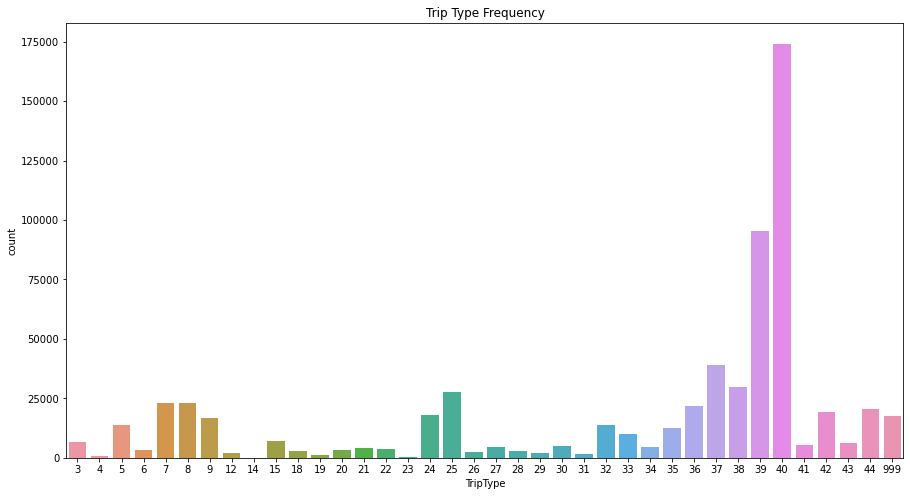

In [25]:
plt.figure(figsize=(15, 8))

sns.countplot(x='TripType', data=walmart)
plt.title('Trip Type Frequency')

Text(0.5, 1.0, 'Weekday Trips')

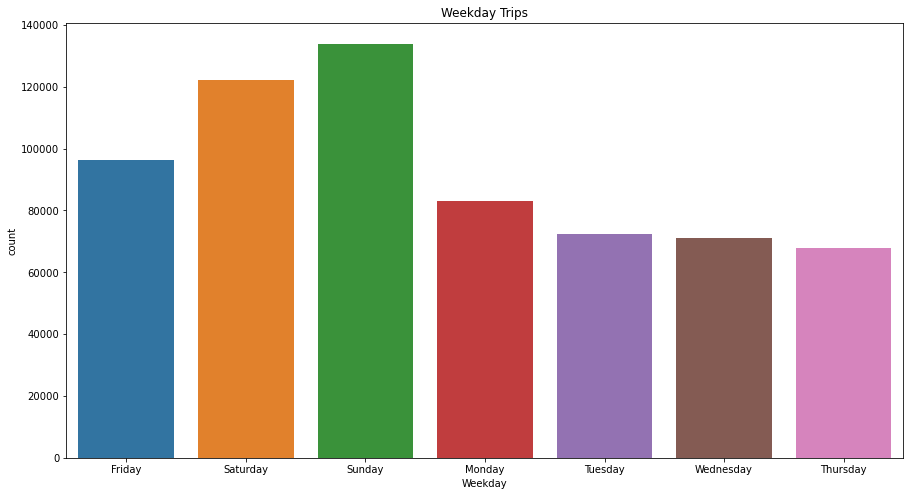

In [28]:
plt.figure(figsize=(15, 8))

sns.countplot(x='Weekday', data=walmart)
plt.title('Weekday Trips')

In [30]:
len(walmart['DepartmentDescription'].unique())

69

In [32]:
walmart['DepartmentDescription'].value_counts()

GROCERY DRY GOODS         70402
DSD GROCERY               68332
PRODUCE                   51115
DAIRY                     43820
PERSONAL CARE             41969
                          ...  
LARGE HOUSEHOLD GOODS        77
CONCEPT STORES               35
SEASONAL                     29
OTHER DEPARTMENTS            29
HEALTH AND BEAUTY AIDS        2
Name: DepartmentDescription, Length: 68, dtype: int64

Text(0.5, 1.0, 'Department Purhases')

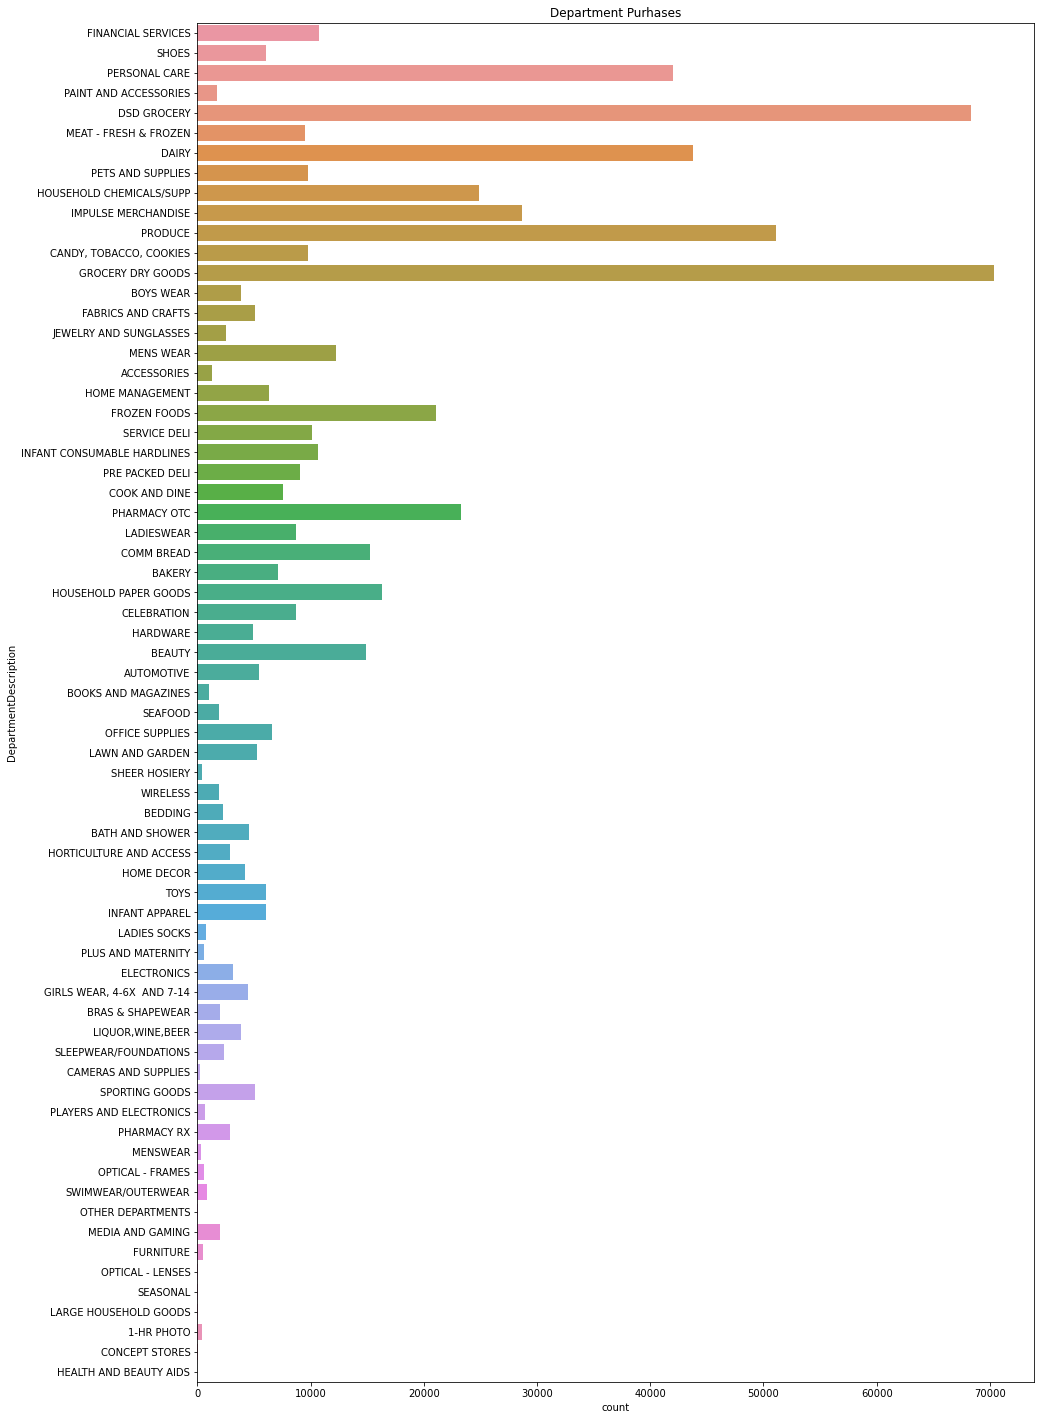

In [33]:
plt.figure(figsize=(15, 25))


sns.countplot(y='DepartmentDescription', data=walmart)
plt.title('Department Purhases')